In [12]:
# MNIST 문제 신경망
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.examples.tutorials.mnist import input_data

In [2]:
# 텐서플로우에 기본 내장된 mnist 모듈을 이용해 데이터를 불러옴
# one_hot 옵션은 레이블을 동물 분류 예제에서 보았던 one_hot 방식의 데이터로 만들어줌
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


In [13]:
#######
# 신경망 모델 구성
#######
# 입력 값의 차원은 [배치크기, 특성값] 으로 되어있음
# 손글씨 이미지는 28x28 픽셀로 이루어져 있고, 이를 784개의 특성값으로 정함
X = tf.placeholder(tf.float32, [None, 784])
# 결과는 0~9의 10가지 분류를 가짐
Y = tf.placeholder(tf.float32, [None, 10])

keep_prob = tf.placeholder(tf.float32) # dropout rate 추가

# 신경망의 레이어 구성
# 784(입력 특성값) -> 256(히든레이어 뉴런 갯수) -> 256(히든 레이어 뉴런 갯수) -> 10(결과값 0~9 분류)
W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
# 입력값에 가중치를 곱하고 ReLU 함수를 이용하여 레이어를 만듦
L1 = tf.nn.relu(tf.matmul(X, W1))
L1 = tf.nn.dropout(L1, keep_prob)

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
# L1 레이어의 출력값에 가중치를 곱하고 ReLU 함수를 이용하여 레이어를 만듦
L2 = tf.nn.relu(tf.matmul(L1, W2))
L2 = tf.nn.dropout(L2, keep_prob)

W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
# 최종 모델의 출력값은 W3 변수를 곱해 10개의 분류 데이터를 가짐
model = tf.matmul(L2, W3)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

In [14]:
#######
# 신경망 모델 학습
#######
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size=100
total_batch=int(mnist.train.num_examples / batch_size)

print('total_batch : ', total_batch)

for epoch in range(30):
    total_cost = 0
    
    for i in range(total_batch):
        # 텐서플로우의 mnist 모델의 next_batch 함수를 이용
        # 지정한 크기만큼 학습할 데이터를 가져옴
        print('i 값 : ', i)
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs, Y:batch_ys, keep_prob : 0.8})
        total_cost += cost_val
        
    print('Epoch:', '%04d' % (epoch + 1),'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))

print('최적화 완료')

total_batch :  550
i 값 :  0
i 값 :  1
i 값 :  2
i 값 :  3
i 값 :  4
i 값 :  5
i 값 :  6
i 값 :  7
i 값 :  8
i 값 :  9
i 값 :  10
i 값 :  11
i 값 :  12
i 값 :  13
i 값 :  14
i 값 :  15
i 값 :  16
i 값 :  17
i 값 :  18
i 값 :  19
i 값 :  20
i 값 :  21
i 값 :  22
i 값 :  23
i 값 :  24
i 값 :  25
i 값 :  26
i 값 :  27
i 값 :  28
i 값 :  29
i 값 :  30
i 값 :  31
i 값 :  32
i 값 :  33
i 값 :  34
i 값 :  35
i 값 :  36
i 값 :  37
i 값 :  38
i 값 :  39
i 값 :  40
i 값 :  41
i 값 :  42
i 값 :  43
i 값 :  44
i 값 :  45
i 값 :  46
i 값 :  47
i 값 :  48
i 값 :  49
i 값 :  50
i 값 :  51
i 값 :  52
i 값 :  53
i 값 :  54
i 값 :  55
i 값 :  56
i 값 :  57
i 값 :  58
i 값 :  59
i 값 :  60
i 값 :  61
i 값 :  62
i 값 :  63
i 값 :  64
i 값 :  65
i 값 :  66
i 값 :  67
i 값 :  68
i 값 :  69
i 값 :  70
i 값 :  71
i 값 :  72
i 값 :  73
i 값 :  74
i 값 :  75
i 값 :  76
i 값 :  77
i 값 :  78
i 값 :  79
i 값 :  80
i 값 :  81
i 값 :  82
i 값 :  83
i 값 :  84
i 값 :  85
i 값 :  86
i 값 :  87
i 값 :  88
i 값 :  89
i 값 :  90
i 값 :  91
i 값 :  92
i 값 :  93
i 값 :  94
i 값 :  95
i 값 :  96
i 값 :  97
i 값 :  98
i

i 값 :  212
i 값 :  213
i 값 :  214
i 값 :  215
i 값 :  216
i 값 :  217
i 값 :  218
i 값 :  219
i 값 :  220
i 값 :  221
i 값 :  222
i 값 :  223
i 값 :  224
i 값 :  225
i 값 :  226
i 값 :  227
i 값 :  228
i 값 :  229
i 값 :  230
i 값 :  231
i 값 :  232
i 값 :  233
i 값 :  234
i 값 :  235
i 값 :  236
i 값 :  237
i 값 :  238
i 값 :  239
i 값 :  240
i 값 :  241
i 값 :  242
i 값 :  243
i 값 :  244
i 값 :  245
i 값 :  246
i 값 :  247
i 값 :  248
i 값 :  249
i 값 :  250
i 값 :  251
i 값 :  252
i 값 :  253
i 값 :  254
i 값 :  255
i 값 :  256
i 값 :  257
i 값 :  258
i 값 :  259
i 값 :  260
i 값 :  261
i 값 :  262
i 값 :  263
i 값 :  264
i 값 :  265
i 값 :  266
i 값 :  267
i 값 :  268
i 값 :  269
i 값 :  270
i 값 :  271
i 값 :  272
i 값 :  273
i 값 :  274
i 값 :  275
i 값 :  276
i 값 :  277
i 값 :  278
i 값 :  279
i 값 :  280
i 값 :  281
i 값 :  282
i 값 :  283
i 값 :  284
i 값 :  285
i 값 :  286
i 값 :  287
i 값 :  288
i 값 :  289
i 값 :  290
i 값 :  291
i 값 :  292
i 값 :  293
i 값 :  294
i 값 :  295
i 값 :  296
i 값 :  297
i 값 :  298
i 값 :  299
i 값 :  300
i 값 :  301
i 값 :  302

i 값 :  431
i 값 :  432
i 값 :  433
i 값 :  434
i 값 :  435
i 값 :  436
i 값 :  437
i 값 :  438
i 값 :  439
i 값 :  440
i 값 :  441
i 값 :  442
i 값 :  443
i 값 :  444
i 값 :  445
i 값 :  446
i 값 :  447
i 값 :  448
i 값 :  449
i 값 :  450
i 값 :  451
i 값 :  452
i 값 :  453
i 값 :  454
i 값 :  455
i 값 :  456
i 값 :  457
i 값 :  458
i 값 :  459
i 값 :  460
i 값 :  461
i 값 :  462
i 값 :  463
i 값 :  464
i 값 :  465
i 값 :  466
i 값 :  467
i 값 :  468
i 값 :  469
i 값 :  470
i 값 :  471
i 값 :  472
i 값 :  473
i 값 :  474
i 값 :  475
i 값 :  476
i 값 :  477
i 값 :  478
i 값 :  479
i 값 :  480
i 값 :  481
i 값 :  482
i 값 :  483
i 값 :  484
i 값 :  485
i 값 :  486
i 값 :  487
i 값 :  488
i 값 :  489
i 값 :  490
i 값 :  491
i 값 :  492
i 값 :  493
i 값 :  494
i 값 :  495
i 값 :  496
i 값 :  497
i 값 :  498
i 값 :  499
i 값 :  500
i 값 :  501
i 값 :  502
i 값 :  503
i 값 :  504
i 값 :  505
i 값 :  506
i 값 :  507
i 값 :  508
i 값 :  509
i 값 :  510
i 값 :  511
i 값 :  512
i 값 :  513
i 값 :  514
i 값 :  515
i 값 :  516
i 값 :  517
i 값 :  518
i 값 :  519
i 값 :  520
i 값 :  521

i 값 :  98
i 값 :  99
i 값 :  100
i 값 :  101
i 값 :  102
i 값 :  103
i 값 :  104
i 값 :  105
i 값 :  106
i 값 :  107
i 값 :  108
i 값 :  109
i 값 :  110
i 값 :  111
i 값 :  112
i 값 :  113
i 값 :  114
i 값 :  115
i 값 :  116
i 값 :  117
i 값 :  118
i 값 :  119
i 값 :  120
i 값 :  121
i 값 :  122
i 값 :  123
i 값 :  124
i 값 :  125
i 값 :  126
i 값 :  127
i 값 :  128
i 값 :  129
i 값 :  130
i 값 :  131
i 값 :  132
i 값 :  133
i 값 :  134
i 값 :  135
i 값 :  136
i 값 :  137
i 값 :  138
i 값 :  139
i 값 :  140
i 값 :  141
i 값 :  142
i 값 :  143
i 값 :  144
i 값 :  145
i 값 :  146
i 값 :  147
i 값 :  148
i 값 :  149
i 값 :  150
i 값 :  151
i 값 :  152
i 값 :  153
i 값 :  154
i 값 :  155
i 값 :  156
i 값 :  157
i 값 :  158
i 값 :  159
i 값 :  160
i 값 :  161
i 값 :  162
i 값 :  163
i 값 :  164
i 값 :  165
i 값 :  166
i 값 :  167
i 값 :  168
i 값 :  169
i 값 :  170
i 값 :  171
i 값 :  172
i 값 :  173
i 값 :  174
i 값 :  175
i 값 :  176
i 값 :  177
i 값 :  178
i 값 :  179
i 값 :  180
i 값 :  181
i 값 :  182
i 값 :  183
i 값 :  184
i 값 :  185
i 값 :  186
i 값 :  187
i 값 :  188
i

i 값 :  304
i 값 :  305
i 값 :  306
i 값 :  307
i 값 :  308
i 값 :  309
i 값 :  310
i 값 :  311
i 값 :  312
i 값 :  313
i 값 :  314
i 값 :  315
i 값 :  316
i 값 :  317
i 값 :  318
i 값 :  319
i 값 :  320
i 값 :  321
i 값 :  322
i 값 :  323
i 값 :  324
i 값 :  325
i 값 :  326
i 값 :  327
i 값 :  328
i 값 :  329
i 값 :  330
i 값 :  331
i 값 :  332
i 값 :  333
i 값 :  334
i 값 :  335
i 값 :  336
i 값 :  337
i 값 :  338
i 값 :  339
i 값 :  340
i 값 :  341
i 값 :  342
i 값 :  343
i 값 :  344
i 값 :  345
i 값 :  346
i 값 :  347
i 값 :  348
i 값 :  349
i 값 :  350
i 값 :  351
i 값 :  352
i 값 :  353
i 값 :  354
i 값 :  355
i 값 :  356
i 값 :  357
i 값 :  358
i 값 :  359
i 값 :  360
i 값 :  361
i 값 :  362
i 값 :  363
i 값 :  364
i 값 :  365
i 값 :  366
i 값 :  367
i 값 :  368
i 값 :  369
i 값 :  370
i 값 :  371
i 값 :  372
i 값 :  373
i 값 :  374
i 값 :  375
i 값 :  376
i 값 :  377
i 값 :  378
i 값 :  379
i 값 :  380
i 값 :  381
i 값 :  382
i 값 :  383
i 값 :  384
i 값 :  385
i 값 :  386
i 값 :  387
i 값 :  388
i 값 :  389
i 값 :  390
i 값 :  391
i 값 :  392
i 값 :  393
i 값 :  394

i 값 :  522
i 값 :  523
i 값 :  524
i 값 :  525
i 값 :  526
i 값 :  527
i 값 :  528
i 값 :  529
i 값 :  530
i 값 :  531
i 값 :  532
i 값 :  533
i 값 :  534
i 값 :  535
i 값 :  536
i 값 :  537
i 값 :  538
i 값 :  539
i 값 :  540
i 값 :  541
i 값 :  542
i 값 :  543
i 값 :  544
i 값 :  545
i 값 :  546
i 값 :  547
i 값 :  548
i 값 :  549
Epoch: 0007 Avg. cost = 0.054
i 값 :  0
i 값 :  1
i 값 :  2
i 값 :  3
i 값 :  4
i 값 :  5
i 값 :  6
i 값 :  7
i 값 :  8
i 값 :  9
i 값 :  10
i 값 :  11
i 값 :  12
i 값 :  13
i 값 :  14
i 값 :  15
i 값 :  16
i 값 :  17
i 값 :  18
i 값 :  19
i 값 :  20
i 값 :  21
i 값 :  22
i 값 :  23
i 값 :  24
i 값 :  25
i 값 :  26
i 값 :  27
i 값 :  28
i 값 :  29
i 값 :  30
i 값 :  31
i 값 :  32
i 값 :  33
i 값 :  34
i 값 :  35
i 값 :  36
i 값 :  37
i 값 :  38
i 값 :  39
i 값 :  40
i 값 :  41
i 값 :  42
i 값 :  43
i 값 :  44
i 값 :  45
i 값 :  46
i 값 :  47
i 값 :  48
i 값 :  49
i 값 :  50
i 값 :  51
i 값 :  52
i 값 :  53
i 값 :  54
i 값 :  55
i 값 :  56
i 값 :  57
i 값 :  58
i 값 :  59
i 값 :  60
i 값 :  61
i 값 :  62
i 값 :  63
i 값 :  64
i 값 :  65
i 값 :  66
i 

i 값 :  185
i 값 :  186
i 값 :  187
i 값 :  188
i 값 :  189
i 값 :  190
i 값 :  191
i 값 :  192
i 값 :  193
i 값 :  194
i 값 :  195
i 값 :  196
i 값 :  197
i 값 :  198
i 값 :  199
i 값 :  200
i 값 :  201
i 값 :  202
i 값 :  203
i 값 :  204
i 값 :  205
i 값 :  206
i 값 :  207
i 값 :  208
i 값 :  209
i 값 :  210
i 값 :  211
i 값 :  212
i 값 :  213
i 값 :  214
i 값 :  215
i 값 :  216
i 값 :  217
i 값 :  218
i 값 :  219
i 값 :  220
i 값 :  221
i 값 :  222
i 값 :  223
i 값 :  224
i 값 :  225
i 값 :  226
i 값 :  227
i 값 :  228
i 값 :  229
i 값 :  230
i 값 :  231
i 값 :  232
i 값 :  233
i 값 :  234
i 값 :  235
i 값 :  236
i 값 :  237
i 값 :  238
i 값 :  239
i 값 :  240
i 값 :  241
i 값 :  242
i 값 :  243
i 값 :  244
i 값 :  245
i 값 :  246
i 값 :  247
i 값 :  248
i 값 :  249
i 값 :  250
i 값 :  251
i 값 :  252
i 값 :  253
i 값 :  254
i 값 :  255
i 값 :  256
i 값 :  257
i 값 :  258
i 값 :  259
i 값 :  260
i 값 :  261
i 값 :  262
i 값 :  263
i 값 :  264
i 값 :  265
i 값 :  266
i 값 :  267
i 값 :  268
i 값 :  269
i 값 :  270
i 값 :  271
i 값 :  272
i 값 :  273
i 값 :  274
i 값 :  275

i 값 :  396
i 값 :  397
i 값 :  398
i 값 :  399
i 값 :  400
i 값 :  401
i 값 :  402
i 값 :  403
i 값 :  404
i 값 :  405
i 값 :  406
i 값 :  407
i 값 :  408
i 값 :  409
i 값 :  410
i 값 :  411
i 값 :  412
i 값 :  413
i 값 :  414
i 값 :  415
i 값 :  416
i 값 :  417
i 값 :  418
i 값 :  419
i 값 :  420
i 값 :  421
i 값 :  422
i 값 :  423
i 값 :  424
i 값 :  425
i 값 :  426
i 값 :  427
i 값 :  428
i 값 :  429
i 값 :  430
i 값 :  431
i 값 :  432
i 값 :  433
i 값 :  434
i 값 :  435
i 값 :  436
i 값 :  437
i 값 :  438
i 값 :  439
i 값 :  440
i 값 :  441
i 값 :  442
i 값 :  443
i 값 :  444
i 값 :  445
i 값 :  446
i 값 :  447
i 값 :  448
i 값 :  449
i 값 :  450
i 값 :  451
i 값 :  452
i 값 :  453
i 값 :  454
i 값 :  455
i 값 :  456
i 값 :  457
i 값 :  458
i 값 :  459
i 값 :  460
i 값 :  461
i 값 :  462
i 값 :  463
i 값 :  464
i 값 :  465
i 값 :  466
i 값 :  467
i 값 :  468
i 값 :  469
i 값 :  470
i 값 :  471
i 값 :  472
i 값 :  473
i 값 :  474
i 값 :  475
i 값 :  476
i 값 :  477
i 값 :  478
i 값 :  479
i 값 :  480
i 값 :  481
i 값 :  482
i 값 :  483
i 값 :  484
i 값 :  485
i 값 :  486

i 값 :  54
i 값 :  55
i 값 :  56
i 값 :  57
i 값 :  58
i 값 :  59
i 값 :  60
i 값 :  61
i 값 :  62
i 값 :  63
i 값 :  64
i 값 :  65
i 값 :  66
i 값 :  67
i 값 :  68
i 값 :  69
i 값 :  70
i 값 :  71
i 값 :  72
i 값 :  73
i 값 :  74
i 값 :  75
i 값 :  76
i 값 :  77
i 값 :  78
i 값 :  79
i 값 :  80
i 값 :  81
i 값 :  82
i 값 :  83
i 값 :  84
i 값 :  85
i 값 :  86
i 값 :  87
i 값 :  88
i 값 :  89
i 값 :  90
i 값 :  91
i 값 :  92
i 값 :  93
i 값 :  94
i 값 :  95
i 값 :  96
i 값 :  97
i 값 :  98
i 값 :  99
i 값 :  100
i 값 :  101
i 값 :  102
i 값 :  103
i 값 :  104
i 값 :  105
i 값 :  106
i 값 :  107
i 값 :  108
i 값 :  109
i 값 :  110
i 값 :  111
i 값 :  112
i 값 :  113
i 값 :  114
i 값 :  115
i 값 :  116
i 값 :  117
i 값 :  118
i 값 :  119
i 값 :  120
i 값 :  121
i 값 :  122
i 값 :  123
i 값 :  124
i 값 :  125
i 값 :  126
i 값 :  127
i 값 :  128
i 값 :  129
i 값 :  130
i 값 :  131
i 값 :  132
i 값 :  133
i 값 :  134
i 값 :  135
i 값 :  136
i 값 :  137
i 값 :  138
i 값 :  139
i 값 :  140
i 값 :  141
i 값 :  142
i 값 :  143
i 값 :  144
i 값 :  145
i 값 :  146
i 값 :  147
i 값 :  148
i

i 값 :  267
i 값 :  268
i 값 :  269
i 값 :  270
i 값 :  271
i 값 :  272
i 값 :  273
i 값 :  274
i 값 :  275
i 값 :  276
i 값 :  277
i 값 :  278
i 값 :  279
i 값 :  280
i 값 :  281
i 값 :  282
i 값 :  283
i 값 :  284
i 값 :  285
i 값 :  286
i 값 :  287
i 값 :  288
i 값 :  289
i 값 :  290
i 값 :  291
i 값 :  292
i 값 :  293
i 값 :  294
i 값 :  295
i 값 :  296
i 값 :  297
i 값 :  298
i 값 :  299
i 값 :  300
i 값 :  301
i 값 :  302
i 값 :  303
i 값 :  304
i 값 :  305
i 값 :  306
i 값 :  307
i 값 :  308
i 값 :  309
i 값 :  310
i 값 :  311
i 값 :  312
i 값 :  313
i 값 :  314
i 값 :  315
i 값 :  316
i 값 :  317
i 값 :  318
i 값 :  319
i 값 :  320
i 값 :  321
i 값 :  322
i 값 :  323
i 값 :  324
i 값 :  325
i 값 :  326
i 값 :  327
i 값 :  328
i 값 :  329
i 값 :  330
i 값 :  331
i 값 :  332
i 값 :  333
i 값 :  334
i 값 :  335
i 값 :  336
i 값 :  337
i 값 :  338
i 값 :  339
i 값 :  340
i 값 :  341
i 값 :  342
i 값 :  343
i 값 :  344
i 값 :  345
i 값 :  346
i 값 :  347
i 값 :  348
i 값 :  349
i 값 :  350
i 값 :  351
i 값 :  352
i 값 :  353
i 값 :  354
i 값 :  355
i 값 :  356
i 값 :  357

i 값 :  478
i 값 :  479
i 값 :  480
i 값 :  481
i 값 :  482
i 값 :  483
i 값 :  484
i 값 :  485
i 값 :  486
i 값 :  487
i 값 :  488
i 값 :  489
i 값 :  490
i 값 :  491
i 값 :  492
i 값 :  493
i 값 :  494
i 값 :  495
i 값 :  496
i 값 :  497
i 값 :  498
i 값 :  499
i 값 :  500
i 값 :  501
i 값 :  502
i 값 :  503
i 값 :  504
i 값 :  505
i 값 :  506
i 값 :  507
i 값 :  508
i 값 :  509
i 값 :  510
i 값 :  511
i 값 :  512
i 값 :  513
i 값 :  514
i 값 :  515
i 값 :  516
i 값 :  517
i 값 :  518
i 값 :  519
i 값 :  520
i 값 :  521
i 값 :  522
i 값 :  523
i 값 :  524
i 값 :  525
i 값 :  526
i 값 :  527
i 값 :  528
i 값 :  529
i 값 :  530
i 값 :  531
i 값 :  532
i 값 :  533
i 값 :  534
i 값 :  535
i 값 :  536
i 값 :  537
i 값 :  538
i 값 :  539
i 값 :  540
i 값 :  541
i 값 :  542
i 값 :  543
i 값 :  544
i 값 :  545
i 값 :  546
i 값 :  547
i 값 :  548
i 값 :  549
Epoch: 0014 Avg. cost = 0.030
i 값 :  0
i 값 :  1
i 값 :  2
i 값 :  3
i 값 :  4
i 값 :  5
i 값 :  6
i 값 :  7
i 값 :  8
i 값 :  9
i 값 :  10
i 값 :  11
i 값 :  12
i 값 :  13
i 값 :  14
i 값 :  15
i 값 :  16
i 값 :  17
i 값 :  1

i 값 :  139
i 값 :  140
i 값 :  141
i 값 :  142
i 값 :  143
i 값 :  144
i 값 :  145
i 값 :  146
i 값 :  147
i 값 :  148
i 값 :  149
i 값 :  150
i 값 :  151
i 값 :  152
i 값 :  153
i 값 :  154
i 값 :  155
i 값 :  156
i 값 :  157
i 값 :  158
i 값 :  159
i 값 :  160
i 값 :  161
i 값 :  162
i 값 :  163
i 값 :  164
i 값 :  165
i 값 :  166
i 값 :  167
i 값 :  168
i 값 :  169
i 값 :  170
i 값 :  171
i 값 :  172
i 값 :  173
i 값 :  174
i 값 :  175
i 값 :  176
i 값 :  177
i 값 :  178
i 값 :  179
i 값 :  180
i 값 :  181
i 값 :  182
i 값 :  183
i 값 :  184
i 값 :  185
i 값 :  186
i 값 :  187
i 값 :  188
i 값 :  189
i 값 :  190
i 값 :  191
i 값 :  192
i 값 :  193
i 값 :  194
i 값 :  195
i 값 :  196
i 값 :  197
i 값 :  198
i 값 :  199
i 값 :  200
i 값 :  201
i 값 :  202
i 값 :  203
i 값 :  204
i 값 :  205
i 값 :  206
i 값 :  207
i 값 :  208
i 값 :  209
i 값 :  210
i 값 :  211
i 값 :  212
i 값 :  213
i 값 :  214
i 값 :  215
i 값 :  216
i 값 :  217
i 값 :  218
i 값 :  219
i 값 :  220
i 값 :  221
i 값 :  222
i 값 :  223
i 값 :  224
i 값 :  225
i 값 :  226
i 값 :  227
i 값 :  228
i 값 :  229

i 값 :  358
i 값 :  359
i 값 :  360
i 값 :  361
i 값 :  362
i 값 :  363
i 값 :  364
i 값 :  365
i 값 :  366
i 값 :  367
i 값 :  368
i 값 :  369
i 값 :  370
i 값 :  371
i 값 :  372
i 값 :  373
i 값 :  374
i 값 :  375
i 값 :  376
i 값 :  377
i 값 :  378
i 값 :  379
i 값 :  380
i 값 :  381
i 값 :  382
i 값 :  383
i 값 :  384
i 값 :  385
i 값 :  386
i 값 :  387
i 값 :  388
i 값 :  389
i 값 :  390
i 값 :  391
i 값 :  392
i 값 :  393
i 값 :  394
i 값 :  395
i 값 :  396
i 값 :  397
i 값 :  398
i 값 :  399
i 값 :  400
i 값 :  401
i 값 :  402
i 값 :  403
i 값 :  404
i 값 :  405
i 값 :  406
i 값 :  407
i 값 :  408
i 값 :  409
i 값 :  410
i 값 :  411
i 값 :  412
i 값 :  413
i 값 :  414
i 값 :  415
i 값 :  416
i 값 :  417
i 값 :  418
i 값 :  419
i 값 :  420
i 값 :  421
i 값 :  422
i 값 :  423
i 값 :  424
i 값 :  425
i 값 :  426
i 값 :  427
i 값 :  428
i 값 :  429
i 값 :  430
i 값 :  431
i 값 :  432
i 값 :  433
i 값 :  434
i 값 :  435
i 값 :  436
i 값 :  437
i 값 :  438
i 값 :  439
i 값 :  440
i 값 :  441
i 값 :  442
i 값 :  443
i 값 :  444
i 값 :  445
i 값 :  446
i 값 :  447
i 값 :  448

i 값 :  11
i 값 :  12
i 값 :  13
i 값 :  14
i 값 :  15
i 값 :  16
i 값 :  17
i 값 :  18
i 값 :  19
i 값 :  20
i 값 :  21
i 값 :  22
i 값 :  23
i 값 :  24
i 값 :  25
i 값 :  26
i 값 :  27
i 값 :  28
i 값 :  29
i 값 :  30
i 값 :  31
i 값 :  32
i 값 :  33
i 값 :  34
i 값 :  35
i 값 :  36
i 값 :  37
i 값 :  38
i 값 :  39
i 값 :  40
i 값 :  41
i 값 :  42
i 값 :  43
i 값 :  44
i 값 :  45
i 값 :  46
i 값 :  47
i 값 :  48
i 값 :  49
i 값 :  50
i 값 :  51
i 값 :  52
i 값 :  53
i 값 :  54
i 값 :  55
i 값 :  56
i 값 :  57
i 값 :  58
i 값 :  59
i 값 :  60
i 값 :  61
i 값 :  62
i 값 :  63
i 값 :  64
i 값 :  65
i 값 :  66
i 값 :  67
i 값 :  68
i 값 :  69
i 값 :  70
i 값 :  71
i 값 :  72
i 값 :  73
i 값 :  74
i 값 :  75
i 값 :  76
i 값 :  77
i 값 :  78
i 값 :  79
i 값 :  80
i 값 :  81
i 값 :  82
i 값 :  83
i 값 :  84
i 값 :  85
i 값 :  86
i 값 :  87
i 값 :  88
i 값 :  89
i 값 :  90
i 값 :  91
i 값 :  92
i 값 :  93
i 값 :  94
i 값 :  95
i 값 :  96
i 값 :  97
i 값 :  98
i 값 :  99
i 값 :  100
i 값 :  101
i 값 :  102
i 값 :  103
i 값 :  104
i 값 :  105
i 값 :  106
i 값 :  107
i 값 :  108
i 값 :  109


i 값 :  234
i 값 :  235
i 값 :  236
i 값 :  237
i 값 :  238
i 값 :  239
i 값 :  240
i 값 :  241
i 값 :  242
i 값 :  243
i 값 :  244
i 값 :  245
i 값 :  246
i 값 :  247
i 값 :  248
i 값 :  249
i 값 :  250
i 값 :  251
i 값 :  252
i 값 :  253
i 값 :  254
i 값 :  255
i 값 :  256
i 값 :  257
i 값 :  258
i 값 :  259
i 값 :  260
i 값 :  261
i 값 :  262
i 값 :  263
i 값 :  264
i 값 :  265
i 값 :  266
i 값 :  267
i 값 :  268
i 값 :  269
i 값 :  270
i 값 :  271
i 값 :  272
i 값 :  273
i 값 :  274
i 값 :  275
i 값 :  276
i 값 :  277
i 값 :  278
i 값 :  279
i 값 :  280
i 값 :  281
i 값 :  282
i 값 :  283
i 값 :  284
i 값 :  285
i 값 :  286
i 값 :  287
i 값 :  288
i 값 :  289
i 값 :  290
i 값 :  291
i 값 :  292
i 값 :  293
i 값 :  294
i 값 :  295
i 값 :  296
i 값 :  297
i 값 :  298
i 값 :  299
i 값 :  300
i 값 :  301
i 값 :  302
i 값 :  303
i 값 :  304
i 값 :  305
i 값 :  306
i 값 :  307
i 값 :  308
i 값 :  309
i 값 :  310
i 값 :  311
i 값 :  312
i 값 :  313
i 값 :  314
i 값 :  315
i 값 :  316
i 값 :  317
i 값 :  318
i 값 :  319
i 값 :  320
i 값 :  321
i 값 :  322
i 값 :  323
i 값 :  324

i 값 :  444
i 값 :  445
i 값 :  446
i 값 :  447
i 값 :  448
i 값 :  449
i 값 :  450
i 값 :  451
i 값 :  452
i 값 :  453
i 값 :  454
i 값 :  455
i 값 :  456
i 값 :  457
i 값 :  458
i 값 :  459
i 값 :  460
i 값 :  461
i 값 :  462
i 값 :  463
i 값 :  464
i 값 :  465
i 값 :  466
i 값 :  467
i 값 :  468
i 값 :  469
i 값 :  470
i 값 :  471
i 값 :  472
i 값 :  473
i 값 :  474
i 값 :  475
i 값 :  476
i 값 :  477
i 값 :  478
i 값 :  479
i 값 :  480
i 값 :  481
i 값 :  482
i 값 :  483
i 값 :  484
i 값 :  485
i 값 :  486
i 값 :  487
i 값 :  488
i 값 :  489
i 값 :  490
i 값 :  491
i 값 :  492
i 값 :  493
i 값 :  494
i 값 :  495
i 값 :  496
i 값 :  497
i 값 :  498
i 값 :  499
i 값 :  500
i 값 :  501
i 값 :  502
i 값 :  503
i 값 :  504
i 값 :  505
i 값 :  506
i 값 :  507
i 값 :  508
i 값 :  509
i 값 :  510
i 값 :  511
i 값 :  512
i 값 :  513
i 값 :  514
i 값 :  515
i 값 :  516
i 값 :  517
i 값 :  518
i 값 :  519
i 값 :  520
i 값 :  521
i 값 :  522
i 값 :  523
i 값 :  524
i 값 :  525
i 값 :  526
i 값 :  527
i 값 :  528
i 값 :  529
i 값 :  530
i 값 :  531
i 값 :  532
i 값 :  533
i 값 :  534

i 값 :  115
i 값 :  116
i 값 :  117
i 값 :  118
i 값 :  119
i 값 :  120
i 값 :  121
i 값 :  122
i 값 :  123
i 값 :  124
i 값 :  125
i 값 :  126
i 값 :  127
i 값 :  128
i 값 :  129
i 값 :  130
i 값 :  131
i 값 :  132
i 값 :  133
i 값 :  134
i 값 :  135
i 값 :  136
i 값 :  137
i 값 :  138
i 값 :  139
i 값 :  140
i 값 :  141
i 값 :  142
i 값 :  143
i 값 :  144
i 값 :  145
i 값 :  146
i 값 :  147
i 값 :  148
i 값 :  149
i 값 :  150
i 값 :  151
i 값 :  152
i 값 :  153
i 값 :  154
i 값 :  155
i 값 :  156
i 값 :  157
i 값 :  158
i 값 :  159
i 값 :  160
i 값 :  161
i 값 :  162
i 값 :  163
i 값 :  164
i 값 :  165
i 값 :  166
i 값 :  167
i 값 :  168
i 값 :  169
i 값 :  170
i 값 :  171
i 값 :  172
i 값 :  173
i 값 :  174
i 값 :  175
i 값 :  176
i 값 :  177
i 값 :  178
i 값 :  179
i 값 :  180
i 값 :  181
i 값 :  182
i 값 :  183
i 값 :  184
i 값 :  185
i 값 :  186
i 값 :  187
i 값 :  188
i 값 :  189
i 값 :  190
i 값 :  191
i 값 :  192
i 값 :  193
i 값 :  194
i 값 :  195
i 값 :  196
i 값 :  197
i 값 :  198
i 값 :  199
i 값 :  200
i 값 :  201
i 값 :  202
i 값 :  203
i 값 :  204
i 값 :  205

i 값 :  330
i 값 :  331
i 값 :  332
i 값 :  333
i 값 :  334
i 값 :  335
i 값 :  336
i 값 :  337
i 값 :  338
i 값 :  339
i 값 :  340
i 값 :  341
i 값 :  342
i 값 :  343
i 값 :  344
i 값 :  345
i 값 :  346
i 값 :  347
i 값 :  348
i 값 :  349
i 값 :  350
i 값 :  351
i 값 :  352
i 값 :  353
i 값 :  354
i 값 :  355
i 값 :  356
i 값 :  357
i 값 :  358
i 값 :  359
i 값 :  360
i 값 :  361
i 값 :  362
i 값 :  363
i 값 :  364
i 값 :  365
i 값 :  366
i 값 :  367
i 값 :  368
i 값 :  369
i 값 :  370
i 값 :  371
i 값 :  372
i 값 :  373
i 값 :  374
i 값 :  375
i 값 :  376
i 값 :  377
i 값 :  378
i 값 :  379
i 값 :  380
i 값 :  381
i 값 :  382
i 값 :  383
i 값 :  384
i 값 :  385
i 값 :  386
i 값 :  387
i 값 :  388
i 값 :  389
i 값 :  390
i 값 :  391
i 값 :  392
i 값 :  393
i 값 :  394
i 값 :  395
i 값 :  396
i 값 :  397
i 값 :  398
i 값 :  399
i 값 :  400
i 값 :  401
i 값 :  402
i 값 :  403
i 값 :  404
i 값 :  405
i 값 :  406
i 값 :  407
i 값 :  408
i 값 :  409
i 값 :  410
i 값 :  411
i 값 :  412
i 값 :  413
i 값 :  414
i 값 :  415
i 값 :  416
i 값 :  417
i 값 :  418
i 값 :  419
i 값 :  420

i 값 :  534
i 값 :  535
i 값 :  536
i 값 :  537
i 값 :  538
i 값 :  539
i 값 :  540
i 값 :  541
i 값 :  542
i 값 :  543
i 값 :  544
i 값 :  545
i 값 :  546
i 값 :  547
i 값 :  548
i 값 :  549
Epoch: 0025 Avg. cost = 0.019
i 값 :  0
i 값 :  1
i 값 :  2
i 값 :  3
i 값 :  4
i 값 :  5
i 값 :  6
i 값 :  7
i 값 :  8
i 값 :  9
i 값 :  10
i 값 :  11
i 값 :  12
i 값 :  13
i 값 :  14
i 값 :  15
i 값 :  16
i 값 :  17
i 값 :  18
i 값 :  19
i 값 :  20
i 값 :  21
i 값 :  22
i 값 :  23
i 값 :  24
i 값 :  25
i 값 :  26
i 값 :  27
i 값 :  28
i 값 :  29
i 값 :  30
i 값 :  31
i 값 :  32
i 값 :  33
i 값 :  34
i 값 :  35
i 값 :  36
i 값 :  37
i 값 :  38
i 값 :  39
i 값 :  40
i 값 :  41
i 값 :  42
i 값 :  43
i 값 :  44
i 값 :  45
i 값 :  46
i 값 :  47
i 값 :  48
i 값 :  49
i 값 :  50
i 값 :  51
i 값 :  52
i 값 :  53
i 값 :  54
i 값 :  55
i 값 :  56
i 값 :  57
i 값 :  58
i 값 :  59
i 값 :  60
i 값 :  61
i 값 :  62
i 값 :  63
i 값 :  64
i 값 :  65
i 값 :  66
i 값 :  67
i 값 :  68
i 값 :  69
i 값 :  70
i 값 :  71
i 값 :  72
i 값 :  73
i 값 :  74
i 값 :  75
i 값 :  76
i 값 :  77
i 값 :  78
i 값 :  79
i 값 

i 값 :  197
i 값 :  198
i 값 :  199
i 값 :  200
i 값 :  201
i 값 :  202
i 값 :  203
i 값 :  204
i 값 :  205
i 값 :  206
i 값 :  207
i 값 :  208
i 값 :  209
i 값 :  210
i 값 :  211
i 값 :  212
i 값 :  213
i 값 :  214
i 값 :  215
i 값 :  216
i 값 :  217
i 값 :  218
i 값 :  219
i 값 :  220
i 값 :  221
i 값 :  222
i 값 :  223
i 값 :  224
i 값 :  225
i 값 :  226
i 값 :  227
i 값 :  228
i 값 :  229
i 값 :  230
i 값 :  231
i 값 :  232
i 값 :  233
i 값 :  234
i 값 :  235
i 값 :  236
i 값 :  237
i 값 :  238
i 값 :  239
i 값 :  240
i 값 :  241
i 값 :  242
i 값 :  243
i 값 :  244
i 값 :  245
i 값 :  246
i 값 :  247
i 값 :  248
i 값 :  249
i 값 :  250
i 값 :  251
i 값 :  252
i 값 :  253
i 값 :  254
i 값 :  255
i 값 :  256
i 값 :  257
i 값 :  258
i 값 :  259
i 값 :  260
i 값 :  261
i 값 :  262
i 값 :  263
i 값 :  264
i 값 :  265
i 값 :  266
i 값 :  267
i 값 :  268
i 값 :  269
i 값 :  270
i 값 :  271
i 값 :  272
i 값 :  273
i 값 :  274
i 값 :  275
i 값 :  276
i 값 :  277
i 값 :  278
i 값 :  279
i 값 :  280
i 값 :  281
i 값 :  282
i 값 :  283
i 값 :  284
i 값 :  285
i 값 :  286
i 값 :  287

i 값 :  410
i 값 :  411
i 값 :  412
i 값 :  413
i 값 :  414
i 값 :  415
i 값 :  416
i 값 :  417
i 값 :  418
i 값 :  419
i 값 :  420
i 값 :  421
i 값 :  422
i 값 :  423
i 값 :  424
i 값 :  425
i 값 :  426
i 값 :  427
i 값 :  428
i 값 :  429
i 값 :  430
i 값 :  431
i 값 :  432
i 값 :  433
i 값 :  434
i 값 :  435
i 값 :  436
i 값 :  437
i 값 :  438
i 값 :  439
i 값 :  440
i 값 :  441
i 값 :  442
i 값 :  443
i 값 :  444
i 값 :  445
i 값 :  446
i 값 :  447
i 값 :  448
i 값 :  449
i 값 :  450
i 값 :  451
i 값 :  452
i 값 :  453
i 값 :  454
i 값 :  455
i 값 :  456
i 값 :  457
i 값 :  458
i 값 :  459
i 값 :  460
i 값 :  461
i 값 :  462
i 값 :  463
i 값 :  464
i 값 :  465
i 값 :  466
i 값 :  467
i 값 :  468
i 값 :  469
i 값 :  470
i 값 :  471
i 값 :  472
i 값 :  473
i 값 :  474
i 값 :  475
i 값 :  476
i 값 :  477
i 값 :  478
i 값 :  479
i 값 :  480
i 값 :  481
i 값 :  482
i 값 :  483
i 값 :  484
i 값 :  485
i 값 :  486
i 값 :  487
i 값 :  488
i 값 :  489
i 값 :  490
i 값 :  491
i 값 :  492
i 값 :  493
i 값 :  494
i 값 :  495
i 값 :  496
i 값 :  497
i 값 :  498
i 값 :  499
i 값 :  500

i 값 :  78
i 값 :  79
i 값 :  80
i 값 :  81
i 값 :  82
i 값 :  83
i 값 :  84
i 값 :  85
i 값 :  86
i 값 :  87
i 값 :  88
i 값 :  89
i 값 :  90
i 값 :  91
i 값 :  92
i 값 :  93
i 값 :  94
i 값 :  95
i 값 :  96
i 값 :  97
i 값 :  98
i 값 :  99
i 값 :  100
i 값 :  101
i 값 :  102
i 값 :  103
i 값 :  104
i 값 :  105
i 값 :  106
i 값 :  107
i 값 :  108
i 값 :  109
i 값 :  110
i 값 :  111
i 값 :  112
i 값 :  113
i 값 :  114
i 값 :  115
i 값 :  116
i 값 :  117
i 값 :  118
i 값 :  119
i 값 :  120
i 값 :  121
i 값 :  122
i 값 :  123
i 값 :  124
i 값 :  125
i 값 :  126
i 값 :  127
i 값 :  128
i 값 :  129
i 값 :  130
i 값 :  131
i 값 :  132
i 값 :  133
i 값 :  134
i 값 :  135
i 값 :  136
i 값 :  137
i 값 :  138
i 값 :  139
i 값 :  140
i 값 :  141
i 값 :  142
i 값 :  143
i 값 :  144
i 값 :  145
i 값 :  146
i 값 :  147
i 값 :  148
i 값 :  149
i 값 :  150
i 값 :  151
i 값 :  152
i 값 :  153
i 값 :  154
i 값 :  155
i 값 :  156
i 값 :  157
i 값 :  158
i 값 :  159
i 값 :  160
i 값 :  161
i 값 :  162
i 값 :  163
i 값 :  164
i 값 :  165
i 값 :  166
i 값 :  167
i 값 :  168
i 값 :  169
i 값 :  170

In [15]:
#######
# 결과 확인
#######
# model 로 예측한 값과 실제 레이블인 Y의 값을 비교
# tf.argmax 함수를 이용해 예측한 값에서 가장 큰 값을 예측한 레이블이라고 평가
# 예) [0.1 0 0 0.7 0 0.2 0 0 0 0] -> 3
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도: ', sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))

정확도:  0.9829


i :  0
labels :  [-17.19242287 -12.02299786  -3.75127554  -6.34792852 -19.58746719
 -14.85004902 -39.97404099  17.95653152 -14.62104797  -6.24823666]
i :  1
labels :  [-17.7956028   -7.92915964  24.78895378  -5.33416271 -34.2822876
 -15.35462093 -15.12757301 -31.84128189 -12.20793056 -41.91947174]
i :  2
labels :  [-19.15919113  12.05879784  -7.44582367 -14.43100548  -3.98295641
 -10.29132271 -10.64078712  -3.22039533  -2.17356539 -13.28532124]
i :  3
labels :  [ 14.77613258 -22.87030792  -6.65042877 -12.17804146 -10.86126232
  -6.14650059  -4.08735561  -2.65099883 -12.88758278  -3.75910234]
i :  4
labels :  [ -5.9421277  -16.26839256 -10.79781246 -22.16455078  13.64545536
 -20.73662949 -11.51251221  -4.31270838 -23.60526657   5.00104713]
i :  5
labels :  [-20.16489792  18.58307648 -13.42995358 -20.18846703  -1.90936375
 -21.90791893 -20.00788307  -1.94137025  -7.29691267 -12.37121773]
i :  6
labels :  [-22.62727356 -20.7936573  -20.2952404  -22.18336487  12.72736263
  -9.81770611 -15.

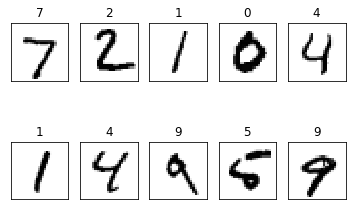

In [17]:
#######
# 결과 확인 (matplot)
#######
labels = sess.run(model, feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1})

fig = plt.figure()
for i in range(10):
    print('i : ', i)
    
    subplot = fig.add_subplot(2,5, i+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    print('labels : ', labels[i])
    subplot.set_title('%d' % np.argmax(labels[i]))
    subplot.imshow(mnist.test.images[i].reshape((28,28)), cmap=plt.cm.gray_r)
    
plt.show()